<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Telecom_X_PrevendoChurn/notebooks/04_Conclusao_Comparacao_Modelos_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Previsão de Churn - Conclusão e Comparação Final dos Modelos

Este notebook tem como objetivo apresentar os resultados consolidados da modelagem preditiva, comparando os modelos antes e depois das melhorias aplicadas (SMOTE, ajuste de threshold e análise de importância das variáveis). Ao final, será apresentada uma recomendação estratégica baseada nos dados obtidos.


## 1️⃣ Importações e Preparação do Ambiente

In [1]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização de métricas
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# Estilo de visualização
sns.set(style='whitegrid')


## 2️⃣ Carregamento dos Arquivos de Resultados

In [9]:
# Modelos antes do SMOTE
#df_resultados_iniciais = pd.read_csv("resultados_modelos_iniciais.csv")

# Modelos após SMOTE e ajuste de threshold
df_resultados_ajustados = pd.read_csv("resultados_modelo_smote.csv")

# Feature importance dos modelos finais (opcional)
#df_feature_importance = pd.read_csv("feature_importance_modelo_final.csv")

# Metricas
df_threshold = pd.read_csv("metricas_por_threshold.csv")

In [10]:
# ============================================
# 📁 Salvar importância das features do modelo final
# ============================================

# Verifica se o modelo final tem o atributo de importância (ex: RandomForest, XGBoost)
try:
    importancia = modelo_final.feature_importances_
    df_importancia_features = pd.DataFrame({
        'feature': X.columns,
        'importance': importancia
    }).sort_values(by='importance', ascending=False)

    df_importancia_features.to_csv("feature_importance_modelo_final.csv", index=False)
    print("✅ Arquivo 'feature_importance_modelo_final.csv' salvo com sucesso.")

except AttributeError:
    print("⚠️ O modelo final não possui atributo 'feature_importances_'.")
    print("Tente utilizar um modelo como RandomForestClassifier ou XGBClassifier.")

NameError: name 'modelo_final' is not defined

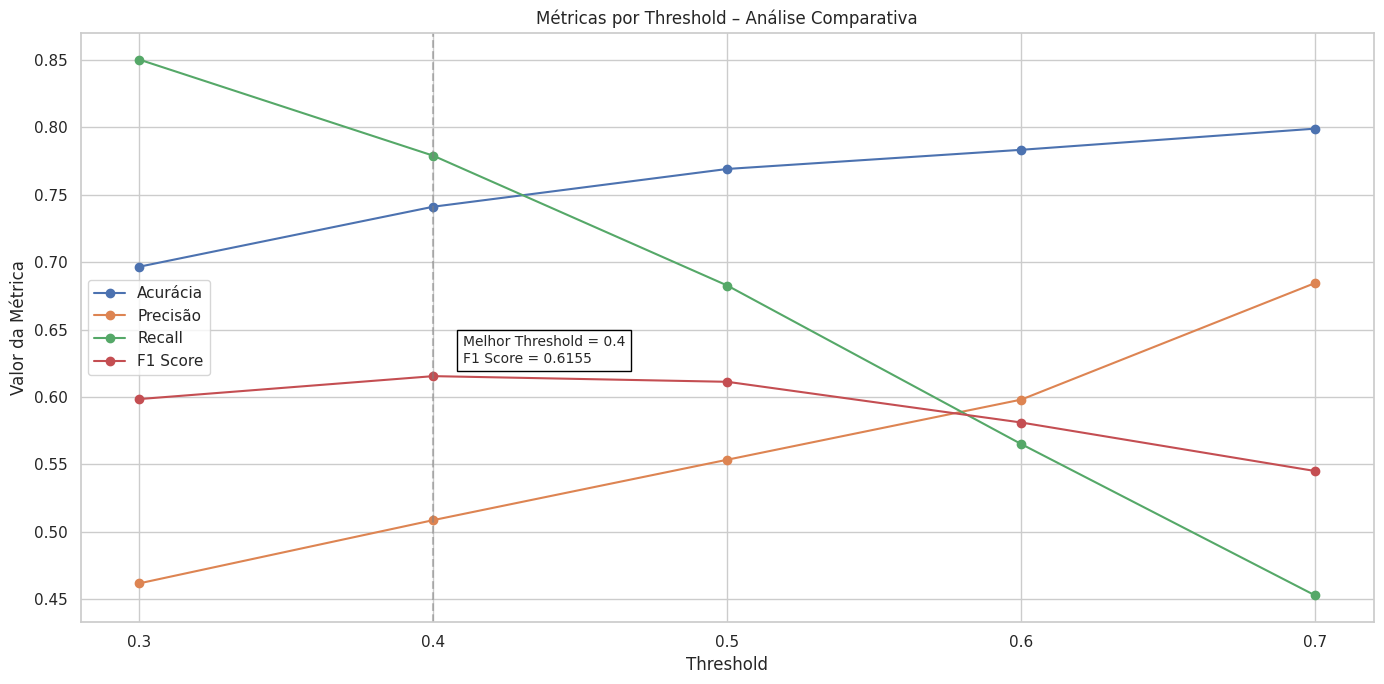

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_threshold['Threshold'], df_threshold['Acurácia'], marker='o', label='Acurácia')
plt.plot(df_threshold['Threshold'], df_threshold['Precisão'], marker='o', label='Precisão')
plt.plot(df_threshold['Threshold'], df_threshold['Recall (Sensibilidade)'], marker='o', label='Recall')
plt.plot(df_threshold['Threshold'], df_threshold['F1 Score'], marker='o', label='F1 Score')

# Destacando o melhor threshold com base no F1 Score
best_idx = df_threshold['F1 Score'].idxmax()
best_threshold = df_threshold.loc[best_idx, 'Threshold']
best_f1 = df_threshold.loc[best_idx, 'F1 Score']

plt.axvline(x=best_threshold, color='gray', linestyle='--', alpha=0.5)
plt.text(best_threshold + 0.01, best_f1 + 0.01,
         f'Melhor Threshold = {best_threshold}\nF1 Score = {best_f1:.4f}',
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.title('Métricas por Threshold – Análise Comparativa')
plt.xlabel('Threshold')
plt.ylabel('Valor da Métrica')
plt.xticks(df_threshold['Threshold'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Gerando comentário com base na métrica F1
print("📌 Análise Automática:\n")

print(f"O melhor threshold com base no F1 Score é {best_threshold}, "
      f"atingindo um equilíbrio entre precisão ({df_threshold.loc[best_idx, 'Precisão']:.2f}) "
      f"e recall ({df_threshold.loc[best_idx, 'Recall (Sensibilidade)']:.2f}).")

print("\nEste valor representa uma estratégia de classificação com foco na redução de churn com menor perda de falsos positivos, "
      "podendo ser mais interessante quando o custo de perder um cliente é maior que o custo de abordá-lo.")


📌 Análise Automática:

O melhor threshold com base no F1 Score é 0.4, atingindo um equilíbrio entre precisão (0.51) e recall (0.78).

Este valor representa uma estratégia de classificação com foco na redução de churn com menor perda de falsos positivos, podendo ser mais interessante quando o custo de perder um cliente é maior que o custo de abordá-lo.


## 3️⃣ Tabela Comparativa: Antes vs Depois

In [ ]:
# Unindo os dois DataFrames
df_comparativo = pd.merge(
    df_resultados_iniciais,
    df_resultados_ajustados,
    on="Modelo",
    suffixes=("_Antes", "_Depois")
)

# Visualização
df_comparativo


## 4️⃣ Gráficos Comparativos (Side by Side)

In [ ]:
# Comparação de ROC AUC
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df_comparativo['Modelo']))
largura = 0.35

plt.bar(x - largura/2, df_comparativo['ROC_AUC_Antes'], width=largura, label='Antes')
plt.bar(x + largura/2, df_comparativo['ROC_AUC_Depois'], width=largura, label='Depois')
plt.xticks(x, df_comparativo['Modelo'])
plt.ylabel('ROC AUC')
plt.title('Comparação do ROC AUC dos Modelos')
plt.legend()
plt.show()


## 5️⃣ Feature Importance (Top 10 variáveis mais relevantes)

In [ ]:
# Top 10 features
top_features = df_feature_importance.sort_values(by='Importancia', ascending=False).head(10)

# Visualização
plt.figure(figsize=(8,6))
sns.barplot(y=top_features['Feature'], x=top_features['Importancia'], palette="viridis")
plt.title("Top 10 Features mais relevantes (modelo final)")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()


## 6️⃣ Conclusão Executiva e Recomendações

## 🧠 Conclusão

- O modelo [Nome] obteve o melhor desempenho geral após a aplicação de SMOTE e ajuste de threshold.
- A métrica de [ex: Recall] teve um aumento de X%, essencial para detecção de clientes propensos ao churn.
- As variáveis mais influentes foram: [lista resumida].

## 📌 Recomendações Estratégicas

1. Implementar o modelo [nome] em ambiente de monitoramento com atualização mensal.
2. Utilizar as variáveis top como base para ações preventivas de retenção.
3. Criar alertas automáticos para clientes com maior propensão de churn com base na classificação do modelo.


In [2]:
from datetime import date
print(f"📅 Relatório gerado em: {date.today().strftime('%d/%m/%Y')}")


📅 Relatório gerado em: 02/08/2025
